<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [2]:
digits = load_digits()

In [9]:
digits.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

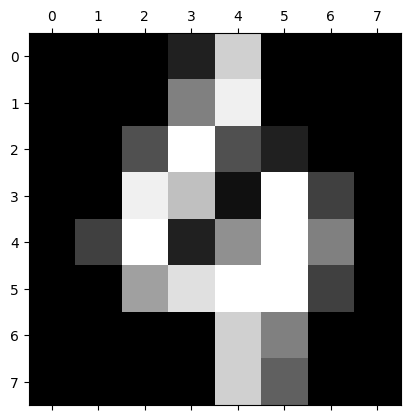

In [10]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()

In [11]:
X = digits.data
Y = digits.target

In [12]:
X_scaled = StandardScaler().fit_transform(X)

In [13]:
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

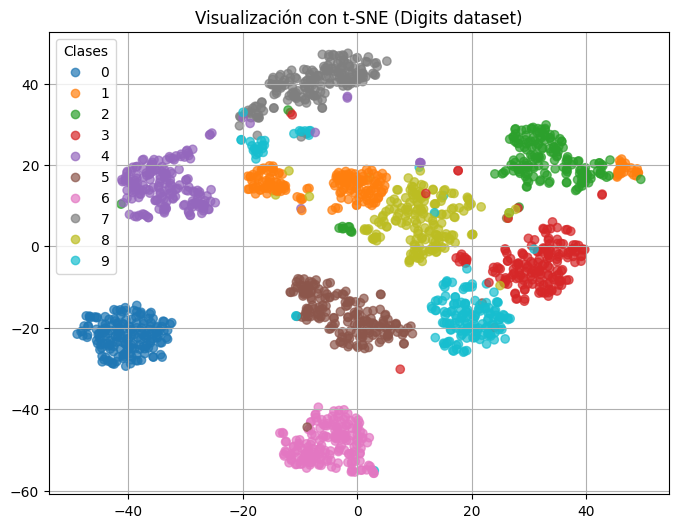

In [16]:
# Graficar
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title("Visualización con t-SNE (Digits dataset)")
plt.grid(True)
plt.show()

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [18]:
import pandas as pd

In [21]:
df = pd.read_csv(path + "/winequality-red.csv")

In [22]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
X = df.drop("quality", axis=1)
Y = df["quality"]

In [34]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

In [35]:
print("Cantidad de componentes:", pca.n_components_)

Cantidad de componentes: 7


<Axes: >

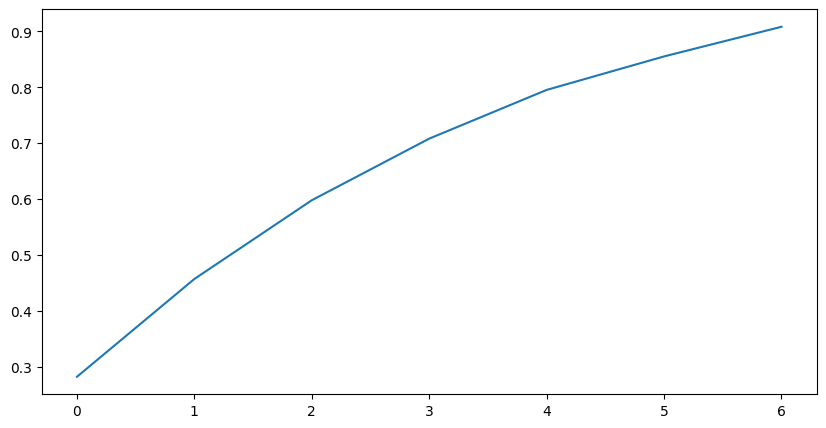

In [36]:
pd.Series(pca.explained_variance_ratio_.cumsum(), name="cumulative explained variance").plot(figsize=(10, 5))

In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


In [39]:
df = pd.read_csv(path + "/kc_house_data.csv")

In [40]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [41]:
from sklearn.compose   import ColumnTransformer
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [45]:
num = ['sqft_living','bathrooms','lat','long']
cat = ['zipcode','waterfront']

In [43]:
num+cat

['sqft_living', 'bathrooms', 'lat', 'lon', 'zipcode', 'waterfront']

In [46]:
X = df[num+cat]
y = df["price"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
pre = ColumnTransformer([
    ('num', Pipeline(
        [
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95))
        ]
    ),num),
    ('cat', OneHotEncoder(drop="first"), cat)
])

In [66]:
lin = Pipeline(
    [
        ('pre', pre),
        ('lin', LinearRegression())
    ]
)
lin.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['sqft_living', 'bathrooms',
                                                   'lat', 'long']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['zipcode', 'waterfront'])])),
                ('lin', LinearRegression())])

In [67]:
pred = lin.predict(X_test)

In [61]:
pred

array([367954.23763791, 904179.71156913, 971334.65669374, ...,
       391787.09652011, 566068.64577319, 404743.23178131])

In [62]:
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

In [68]:
print("MAE :", mean_absolute_error(y_test,pred))
print("RMSE:", rmse(y_test,pred))
print("R²  :", r2_score(y_test,pred))

MAE : 109653.70184747483
RMSE: 185420.75844868482
R²  : 0.7725783478789328


In [69]:
from sklearn.linear_model import Ridge, Lasso

In [70]:
for Model, name in [(Ridge(alpha=1.0), "Ridge"),
                    (Lasso(alpha=0.1),  "Lasso")]:
    mdl = Pipeline([("prep", pre), ("reg", Model)])
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    print(name,
          "RMSE:", rmse(y_test,y_pred),
          "R²:",  r2_score(y_test,y_pred))

Ridge RMSE: 185608.55181278766 R²: 0.7721174512149256
Lasso RMSE: 185420.35548674664 R²: 0.7725793363569318


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222384952374006.22, tolerance: 225891453177.81256
  model = cd_fast.sparse_enet_coordinate_descent(


In [71]:
pre = ColumnTransformer([
    ('num', Pipeline(
        [
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95))
        ]
    ),num),
    ('cat', OneHotEncoder(drop="first"), cat)
])

In [72]:
X_tr_trans = pre.fit_transform(X_train)
print("Shape final:", X_tr_trans.shape)

Shape final: (17290, 74)


In [74]:
pca_model = lin.named_steps["pre"].named_transformers_["num"].named_steps["pca"]

In [75]:
pca_model.n_components_

np.int64(4)

In [77]:
encoder = lin.named_steps["pre"].named_transformers_["cat"]
print("Categorías codificadas:", encoder.get_feature_names_out())

Categorías codificadas: ['zipcode_98002' 'zipcode_98003' 'zipcode_98004' 'zipcode_98005'
 'zipcode_98006' 'zipcode_98007' 'zipcode_98008' 'zipcode_98010'
 'zipcode_98011' 'zipcode_98014' 'zipcode_98019' 'zipcode_98022'
 'zipcode_98023' 'zipcode_98024' 'zipcode_98027' 'zipcode_98028'
 'zipcode_98029' 'zipcode_98030' 'zipcode_98031' 'zipcode_98032'
 'zipcode_98033' 'zipcode_98034' 'zipcode_98038' 'zipcode_98039'
 'zipcode_98040' 'zipcode_98042' 'zipcode_98045' 'zipcode_98052'
 'zipcode_98053' 'zipcode_98055' 'zipcode_98056' 'zipcode_98058'
 'zipcode_98059' 'zipcode_98065' 'zipcode_98070' 'zipcode_98072'
 'zipcode_98074' 'zipcode_98075' 'zipcode_98077' 'zipcode_98092'
 'zipcode_98102' 'zipcode_98103' 'zipcode_98105' 'zipcode_98106'
 'zipcode_98107' 'zipcode_98108' 'zipcode_98109' 'zipcode_98112'
 'zipcode_98115' 'zipcode_98116' 'zipcode_98117' 'zipcode_98118'
 'zipcode_98119' 'zipcode_98122' 'zipcode_98125' 'zipcode_98126'
 'zipcode_98133' 'zipcode_98136' 'zipcode_98144' 'zipcode_98146'
 

In [78]:
num = ["sqft_living", "bathrooms", "lat", "long", "sqft_lot", "bedrooms", "yr_built"]
cat = ["zipcode", "waterfront", "condition", "grade"]

In [79]:
X = df[num+cat]
y = df["price"]

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

pre = ColumnTransformer([
    ("num", Pipeline([("sc",StandardScaler()),
                      ("pca",PCA(n_components=0.95))]), num),
    ("cat", OneHotEncoder(drop="first"), cat)
])

lin = Pipeline([("prep",pre),("lr",LinearRegression())])
lin.fit(X_tr,y_tr)
pred = lin.predict(X_te)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
print("MAE :", mean_absolute_error(y_te,pred))
print("RMSE:", rmse(y_te,pred))
print("R²  :", r2_score(y_te,pred))

MAE : 96263.78618602717
RMSE: 165624.37999860596
R²  : 0.8185472164302972


In [80]:
num = ["sqft_living", "bathrooms", "lat", "long", "sqft_lot", "bedrooms", "yr_built"]
cat = ["waterfront", "condition", "grade"]

In [81]:
X = df[num+cat]
y = df["price"]

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

pre = ColumnTransformer([
    ("num", Pipeline([("sc",StandardScaler()),
                      ("pca",PCA(n_components=0.95))]), num),
    ("cat", OneHotEncoder(drop="first"), cat)
])

lin = Pipeline([("prep",pre),("lr",LinearRegression())])
lin.fit(X_tr,y_tr)
pred = lin.predict(X_te)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
print("MAE :", mean_absolute_error(y_te,pred))
print("RMSE:", rmse(y_te,pred))
print("R²  :", r2_score(y_te,pred))

MAE : 125883.5445446909
RMSE: 206637.9602770373
R²  : 0.7175540730446212


In [82]:
num = ["sqft_living", "bathrooms", "lat", "long", "sqft_lot", "bedrooms", "yr_built"]
cat = ["zipcode", "waterfront", "condition", "grade"]

In [83]:
X = df[num+cat]
y = df["price"]

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

pre = ColumnTransformer([
    ("num", Pipeline([("sc",StandardScaler()),
                      ("pca",PCA(n_components=0.95))]), num),
    ("cat", OneHotEncoder(drop="first"), cat)
])

lin = Pipeline([("prep",pre),("lr",LinearRegression())])
lin.fit(X_tr,y_tr)
pred = lin.predict(X_te)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
print("MAE :", mean_absolute_error(y_te,pred))
print("RMSE:", rmse(y_te,pred))
print("R²  :", r2_score(y_te,pred))

MAE : 96263.78618602717
RMSE: 165624.37999860596
R²  : 0.8185472164302972


In [85]:
for Model, name in [(Ridge(alpha=1.0), "Ridge"),
                    (Lasso(alpha=0.1,max_iter=100000),  "Lasso")]:
    mdl = Pipeline([("prep", pre), ("reg", Model)])
    mdl.fit(X_tr, y_tr)
    y_pred = mdl.predict(X_te)
    print(name,
          "RMSE:", rmse(y_te,y_pred),
          "R²:",  r2_score(y_te,y_pred))

Ridge RMSE: 165830.37636382855 R²: 0.8180955696519866
Lasso RMSE: 165624.932824597 R²: 0.8185460051112594


In [86]:
for Model, name in [(Ridge(alpha=0.1), "Ridge 0.1"),
                    (Ridge(alpha=0.01), "Ridge 1.0"),
                    (Ridge(alpha=10.0), "Ridge 10.0"),
                    (Lasso(alpha=1,max_iter=10000),  "Lasso 1"),
                    (Lasso(alpha=10,max_iter=10000),  "Lasso 10"),
                    (Lasso(alpha=100,max_iter=10000),  "Lasso 100"),
                    ]:
    mdl = Pipeline([("prep", pre), ("reg", Model)])
    mdl.fit(X_tr, y_tr)
    y_pred = mdl.predict(X_te)
    print(name,
          "RMSE:", rmse(y_te,y_pred),
          "R²:",  r2_score(y_te,y_pred))

Ridge 0.1 RMSE: 165628.78705245885 R²: 0.8185375598467909
Ridge 1.0 RMSE: 165617.42363632304 R²: 0.8185624584471062
Ridge 10.0 RMSE: 169034.13926415017 R²: 0.8109990632140089
Lasso 1 RMSE: 165632.2917588195 R²: 0.8185298802723867
Lasso 10 RMSE: 165713.94004867197 R²: 0.818350925109437
Lasso 100 RMSE: 166304.44080873916 R²: 0.817054051382487


In [87]:
beta = lin.named_steps['lr'].coef_
feature_names = lin.named_steps['prep'].get_feature_names_out(num + cat)
pd.Series(beta, index=feature_names).sort_values(key=abs, ascending=False).head(10)

,0
cat__grade_13,2.105769e+06
cat__zipcode_98039,1.127695e+06
cat__grade_12,8.703386e+05
cat__waterfront_1,7.887491e+05
cat__zipcode_98004,6.629506e+05
cat__zipcode_98112,4.938669e+05
cat__zipcode_98040,4.565285e+05
cat__grade_11,4.518589e+05
cat__zipcode_98109,3.964299e+05
cat__zipcode_98119,3.732756e+05
